# Extract the dataset to the file path

In [45]:
# Helper code block to extract the zip files
import zipfile
with zipfile.ZipFile("Training Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("train_dataset")

# Library imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Pre-process the data

In [63]:
# Lists to store the image data as well to store the image labels
data = []
labels = []

In [48]:
# Main preprocesser method
def prepare_data(character):
    
    # This loop runs for all the 1000 files for the character
    for i in range(1,1001):
        a = pd.read_csv("train_dataset/Training Dataset/character_"+str(character)+"/"+str(i)+".csv", header=None)
        for i in range(a.shape[0]):
            median = a[i].median()
            
            # If the column has a NAN value, the execution will pass on the try block
            try:
                a[i].fillna(value=median, inplace=True)
            
            # In case the column did not have a NAN value, execution just skips over to the next column
            except:
                continue
        
        # Convert the dataframe into a numpy array of the same dimensions and flatten it out
        a = a.to_numpy().flatten()
        
        
        # Append the data to the data list and its corresponding label to the labels list
        data.append(a)
        labels.append(character+1)

In [49]:
# Run the above preprocessor methos for all characters. (Total runs=10000)
for i in range(10):
    prepare_data(i)

In [52]:
# Convert the list to a numpy array for efficiency
data_array = np.asarray(data)

In [53]:
# The final array contains all 10000 images flattened to a (1,784) vector.
data_array.shape

(10000, 784)

In [60]:
# Convert the numpy array to a dataframe and add the labels as a column to the dataset
df = pd.DataFrame(data_array)
df["Labels"] = labels

In [62]:
# Export the preprocessed dataset to a file named 'median_processed,csv' in the notebook's path
df.to_csv('median_processed.csv', index=False)

# Use OpenCV

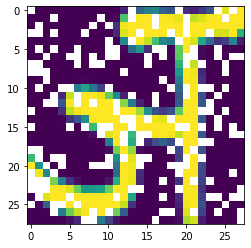

In [50]:
import cv2 as cv

image = pd.read_csv("train_dataset/Training Dataset/character_"+str(0)+"/"+str(1)+".csv", header=None).to_numpy().astype("float32")
plt.imshow(image)

x = np.isnan(image)

mask = np.zeros(image.shape, dtype="uint8")
for i in range(len(x)):
    for j in range(len(x)):
        if x[i][j] == True:
            mask[i][j] = 255


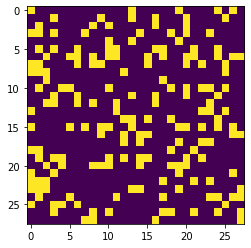

In [51]:
plt.imshow(mask)

dst = cv.inpaint(image, mask, 9, cv.INPAINT_TELEA)

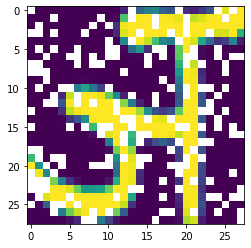

In [52]:
plt.imshow(dst)